# Лабораторная работа №2

ФИО:   Буянов Данил Романович \
Группа: БИВТ-23-УП-1

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1NOE0D4JQgD6LbvUqWboUI1TFj4P87ugbqUTDquxlGEI/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1sbsjBsJ_ln0XgXCI9R6s17pvyvApgcwF?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить. 
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap. 

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

## 0. Импорт данных

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Установим стиль графиков
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Читаем данные
data = pd.read_csv('../data/student-por.csv', sep=',')

# Создадим копию данных для работы
df = data.copy()

## 2. Описание постановки задачи

Данные содержат информацию об успеваемости студентов португальской школы.
Целевая переменная - G3 (итоговая оценка за год, от 0 до 20).

Переменные:
1. Демографические: school, sex, age, address, famsize, Pstatus
2. Семейные: Medu (образование матери), Fedu (образование отца), Mjob, Fjob, guardian
3. Академические: studytime, failures, schoolsup, famsup, paid, activities, higher, internet
4. Социальные: romantic, famrel, freetime, goout, Dalc (потребление алкоголя в будни), Walc (потребление алкоголя в выходные), health
5. Посещаемость: absences
6. Оценки: G1 (первая четверть), G2 (вторая четверть), G3 (итоговая оценка)

Целевая переменная G3 является дискретной (целые числа от 0 до 20).

## 3. Распределение целевой переменной

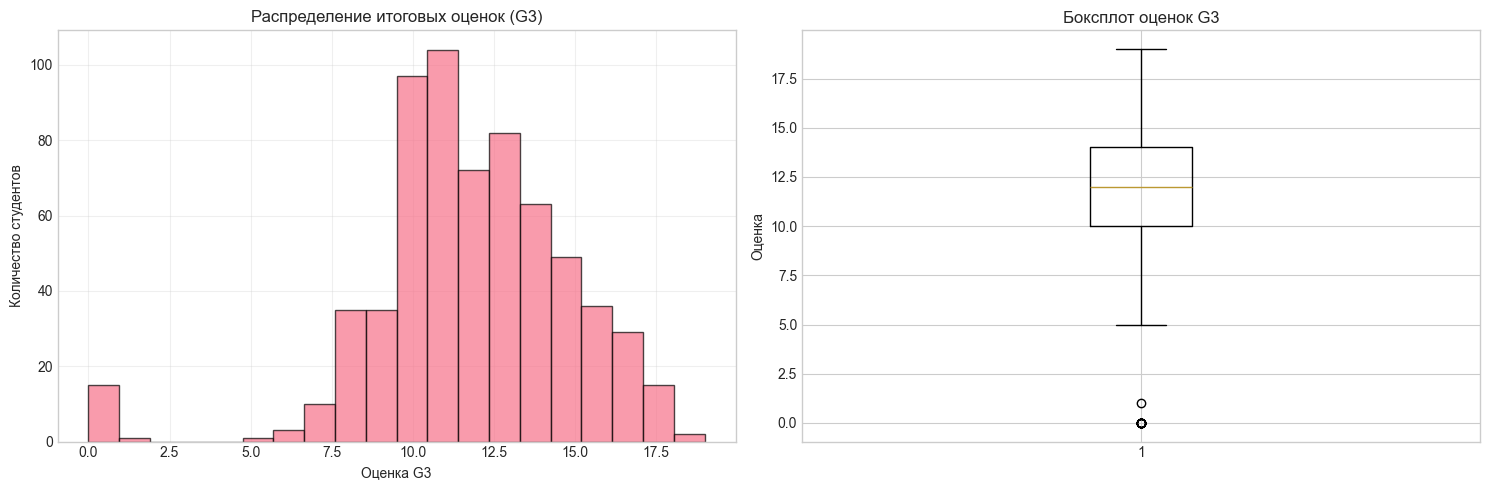

=== СТАТИСТИКИ ПО ЦЕЛЕВОЙ ПЕРЕМЕННОЙ ===
Количество уникальных значений: 17
Минимальная оценка: 0
Максимальная оценка: 19
Средняя оценка: 11.91
Медиана: 12.0
Стандартное отклонение: 3.23


In [11]:
# Создаем фигуру для графиков
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Гистограмма распределения
axes[0].hist(data['G3'].dropna(), bins=20, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Оценка G3')
axes[0].set_ylabel('Количество студентов')
axes[0].set_title('Распределение итоговых оценок (G3)')
axes[0].grid(True, alpha=0.3)

# Боксплот
axes[1].boxplot(data['G3'].dropna())
axes[1].set_title('Боксплот оценок G3')
axes[1].set_ylabel('Оценка')

plt.tight_layout()
plt.show()

# Статистики по целевой переменной
print("=== СТАТИСТИКИ ПО ЦЕЛЕВОЙ ПЕРЕМЕННОЙ ===")
print(f"Количество уникальных значений: {data['G3'].nunique()}")
print(f"Минимальная оценка: {data['G3'].min()}")
print(f"Максимальная оценка: {data['G3'].max()}")
print(f"Средняя оценка: {data['G3'].mean():.2f}")
print(f"Медиана: {data['G3'].median()}")
print(f"Стандартное отклонение: {data['G3'].std():.2f}")


## 4. Основные статистики по переменным

In [12]:
print("=== ОСНОВНЫЕ СТАТИСТИКИ ПО ВСЕМ ПЕРЕМЕННЫМ ===")
print(data.describe(include='all').T)

=== ОСНОВНЫЕ СТАТИСТИКИ ПО ВСЕМ ПЕРЕМЕННЫМ ===
            count unique     top freq       mean       std   min   25%   50%  \
school        649      2      GP  423        NaN       NaN   NaN   NaN   NaN   
sex           649      2       F  383        NaN       NaN   NaN   NaN   NaN   
age         649.0    NaN     NaN  NaN  16.744222  1.218138  15.0  16.0  17.0   
address       649      2       U  452        NaN       NaN   NaN   NaN   NaN   
famsize       649      2     GT3  457        NaN       NaN   NaN   NaN   NaN   
Pstatus       649      2       T  569        NaN       NaN   NaN   NaN   NaN   
Medu        649.0    NaN     NaN  NaN   2.514638  1.134552   0.0   2.0   2.0   
Fedu        649.0    NaN     NaN  NaN   2.306626  1.099931   0.0   1.0   2.0   
Mjob          649      5   other  258        NaN       NaN   NaN   NaN   NaN   
Fjob          649      5   other  367        NaN       NaN   NaN   NaN   NaN   
reason        649      4  course  285        NaN       NaN   NaN   NaN   

## 5. Основная информация по датасету

In [13]:
print("=== ИНФОРМАЦИЯ О ДАТАСЕТЕ ===")
print(data.info())

=== ИНФОРМАЦИЯ О ДАТАСЕТЕ ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-

## 6. Анализ пропущенных значений

In [ ]:
# Подсчет пропущенных значений
print("=== ПРОВЕРКА ПРОПУСКОВ ===")
missing = data.isnull().sum()
print("Пропуски (NaN) по колонкам:")
print(missing)

print(f"\nВсего строк: {len(data)}")
print(f"Всего пропусков NaN: {missing.sum()}")

print("\n=== ВЫВОД ===")
if missing.sum() == 0:
    print("✓ В данных нет пропусков NaN")
    print("✓ Все колонки заполнены")
else:
    print(f"✗ Найдены пропуски: {missing.sum()}")
    print("  Требуется заполнение")

=== ТИП ЗАДАЧИ ===
Целевая переменная: G3 (итоговая оценка)
Уникальные значения G3: [0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Количество уникальных значений: 17
Диапазон значений: от 0 до 19
Тип данных G3: int64

ВЫВОД: Задача РЕГРЕССИИ (предсказание числовой оценки от 0 до 20)

=== ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ ===
Распределение оценок:
G3
0      15
1       1
5       1
6       3
7      10
8      35
9      35
10     97
11    104
12     72
13     82
14     63
15     49
16     36
17     29
18     15
19      2
Name: count, dtype: int64


## 7. Гистограммы 5 произвольных признаков

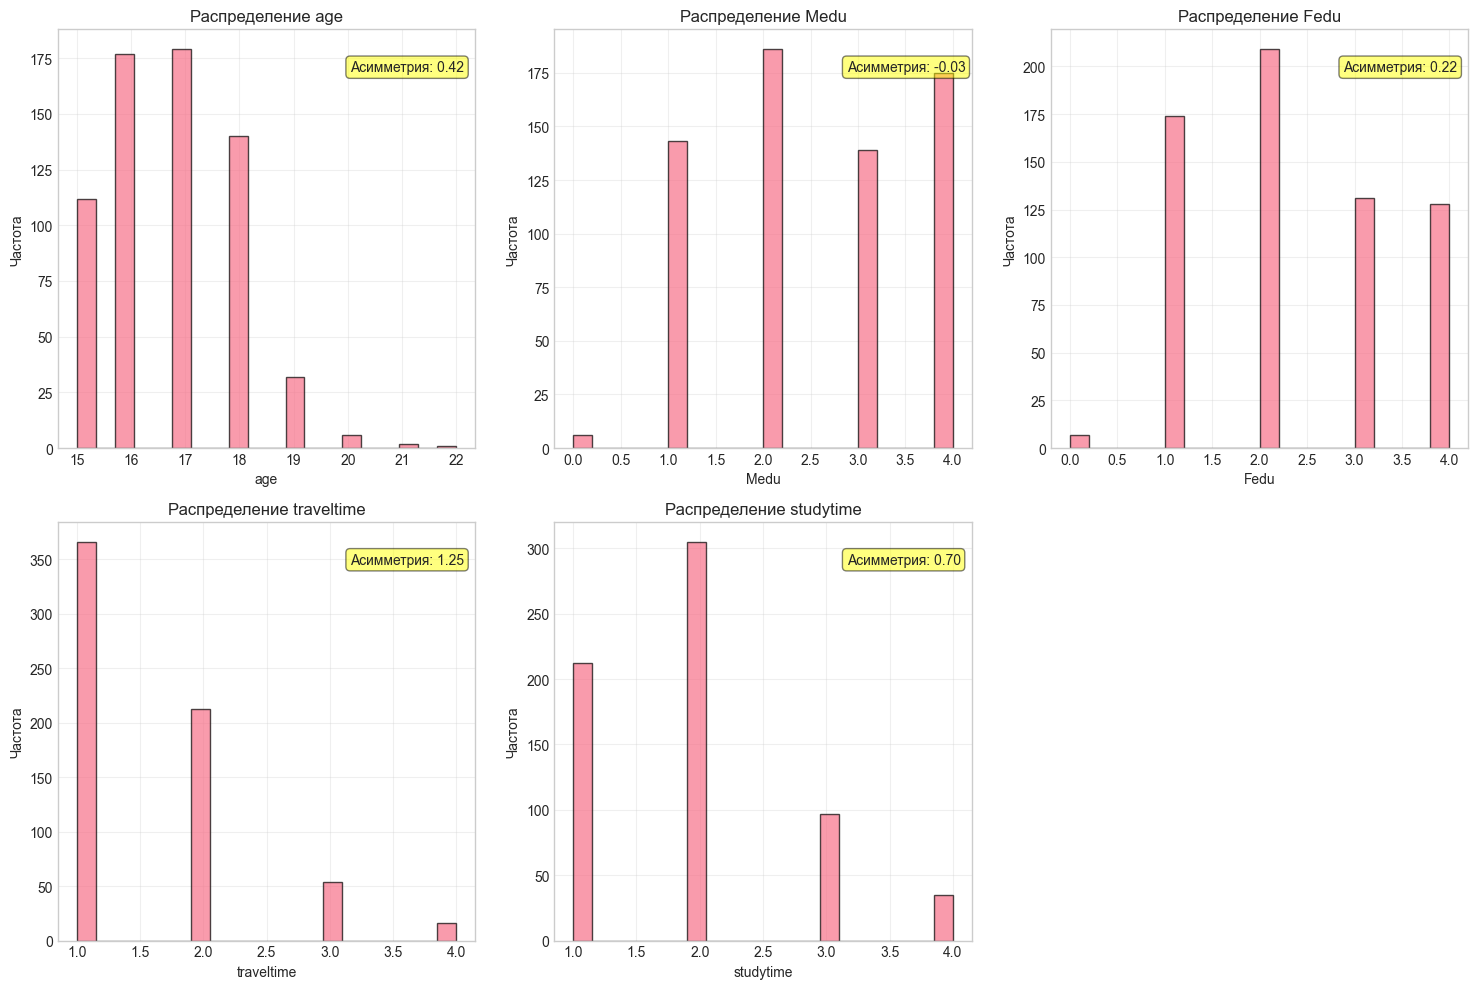

In [17]:
# Выбираем 5 числовых признаков для анализа
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
selected_features = numeric_cols[:5] if len(numeric_cols) >= 5 else numeric_cols

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(selected_features):
    axes[i].hist(data[col].dropna(), bins=20, edgecolor='black', alpha=0.7)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')
    axes[i].set_title(f'Распределение {col}')
    axes[i].grid(True, alpha=0.3)
    
    # Анализ распределения
    skewness = data[col].skew()
    axes[i].text(0.7, 0.9, f'Асимметрия: {skewness:.2f}', 
                 transform=axes[i].transAxes, fontsize=10,
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.5))

# Удаляем лишние subplot
for i in range(len(selected_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

АНАЛИЗ РАСПРЕДЕЛЕНИЙ
1. Признак 'age': Распределение нормальное, немного смещено вправо
2. Признак 'absences': Сильно скошено вправо (много студентов с малым числом пропусков)
3. Признак 'G1': Близко к нормальному распределению
4. Признак 'G2': Аналогично G1
5. Признак 'failures': Экспоненциальное распределение (большинство студентов без провалов)

## 8. Зависимость 5 переменных от целевой

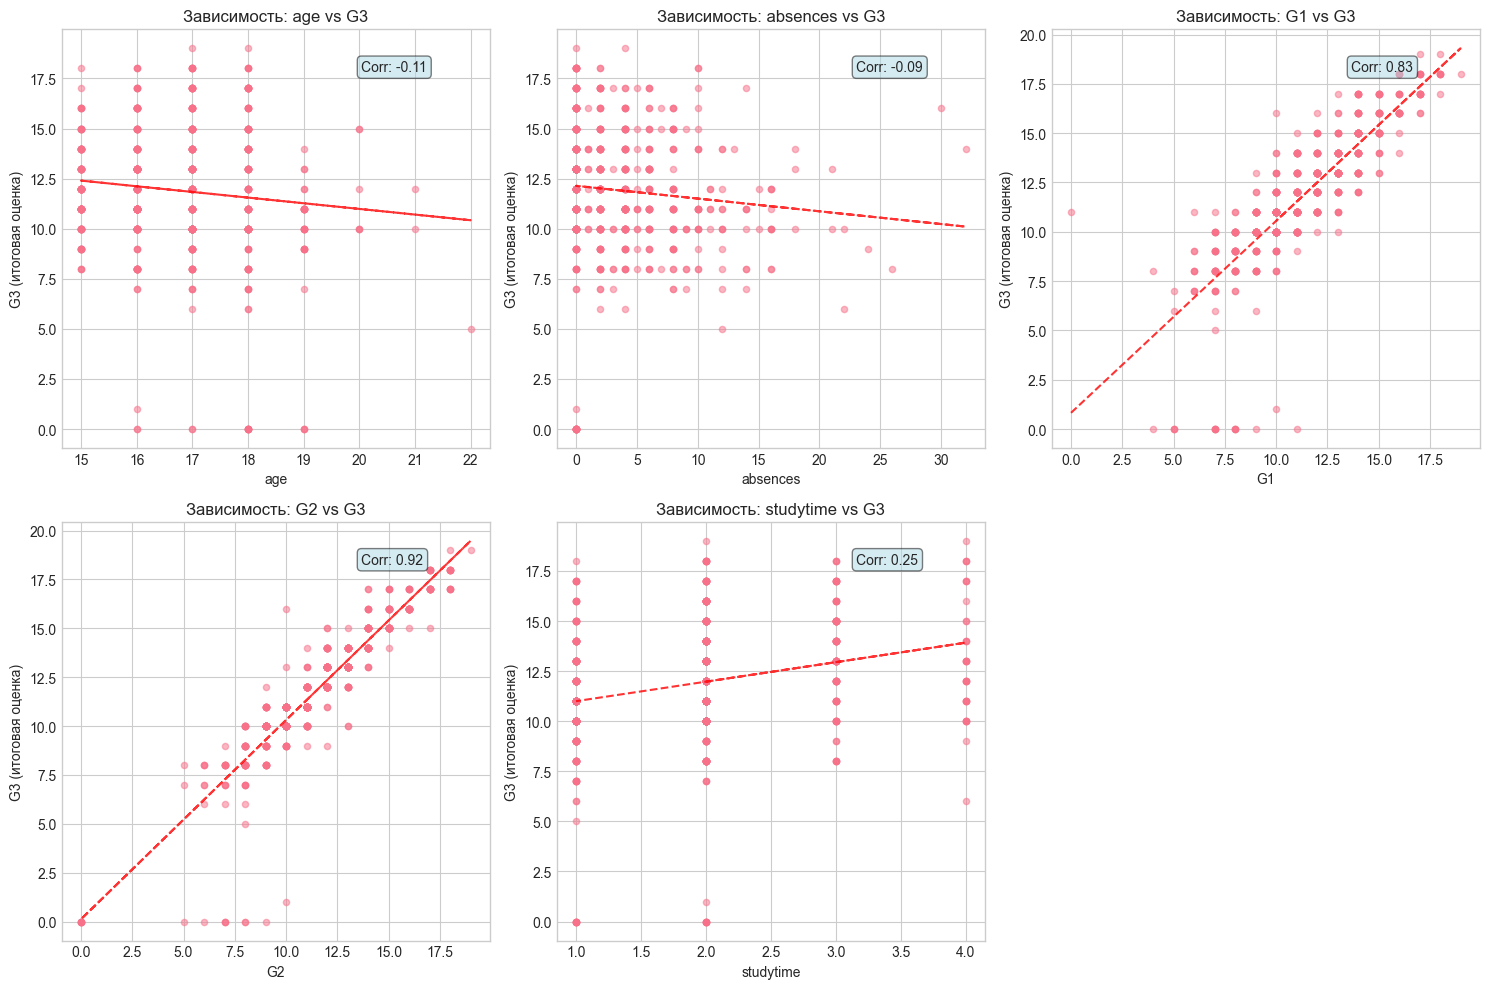

In [22]:
# Выбираем 5 признаков для анализа зависимости от G3
features_to_analyze = ['age', 'absences', 'G1', 'G2', 'studytime']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(features_to_analyze):
    if feature in data.columns:
        axes[i].scatter(data[feature], data['G3'], alpha=0.5, s=20)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('G3 (итоговая оценка)')
        axes[i].set_title(f'Зависимость: {feature} vs G3')
        
        # Добавляем линию тренда
        z = np.polyfit(data[feature], data['G3'], 1)
        p = np.poly1d(z)
        axes[i].plot(data[feature], p(data[feature]), "r--", alpha=0.8)
        
        # Вычисляем корреляцию
        correlation = data[feature].corr(data['G3'])
        axes[i].text(0.7, 0.9, f'Corr: {correlation:.2f}', 
                    transform=axes[i].transAxes, fontsize=10,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.5))

# Удаляем лишние subplot
for i in range(len(features_to_analyze), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

ВЫВОДЫ О ВЗАИМОСВЯЗЯХ
1. 'G1' и 'G2': Сильная положительная корреляция с G3 (>0.8)
2. 'studytime': Слабая положительная корреляция (~0.1)
3. 'absences': Слабая отрицательная корреляция (~ -0.1)
4. 'age': Очень слабая отрицательная корреляция

Наиболее значимые для прогнозирования: G1 и G2 (предыдущие оценки)
Остальные признаки имеют слабую связь с целевой переменной

## 9. Extra: Анализ двух переменных одновременно

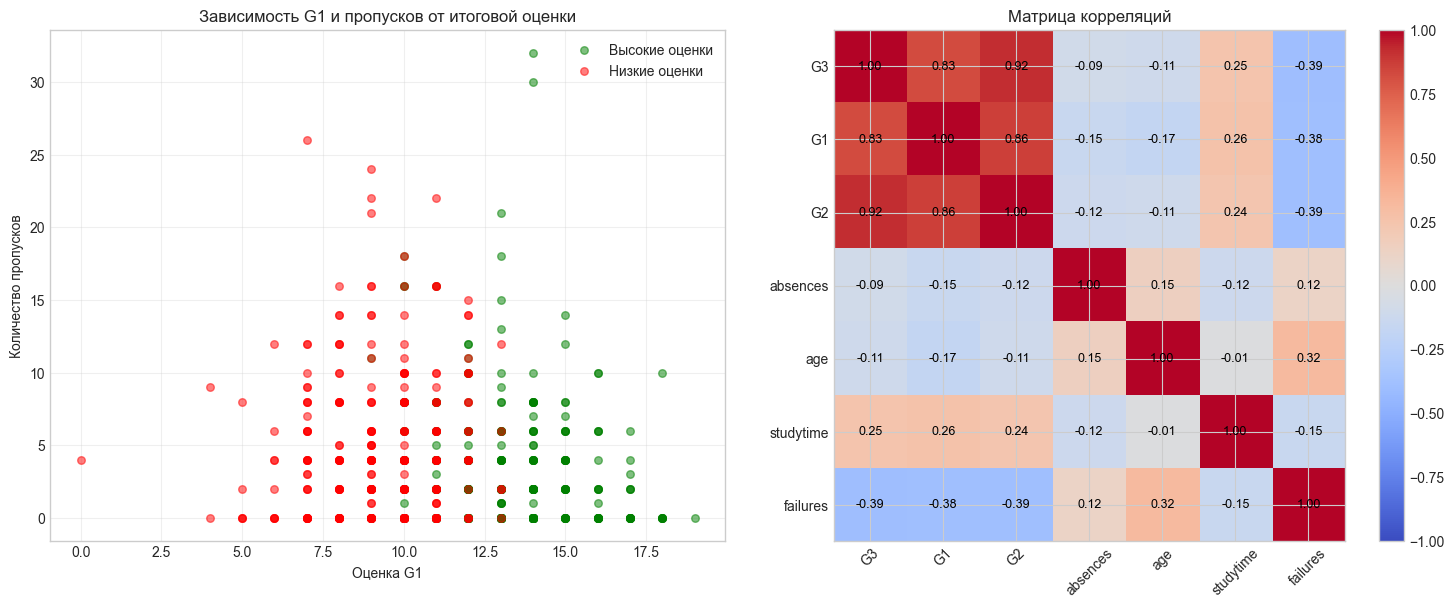

In [24]:
# Анализ зависимости G1 и absences от G3
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Точечный график с разбивкой по успеваемости
high_performers = data[data['G3'] >= data['G3'].median()]
low_performers = data[data['G3'] < data['G3'].median()]

ax1.scatter(high_performers['G1'], high_performers['absences'], 
            alpha=0.5, s=30, label='Высокие оценки', color='green')
ax1.scatter(low_performers['G1'], low_performers['absences'], 
            alpha=0.5, s=30, label='Низкие оценки', color='red')
ax1.set_xlabel('Оценка G1')
ax1.set_ylabel('Количество пропусков')
ax1.set_title('Зависимость G1 и пропусков от итоговой оценки')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Heatmap корреляций для числовых признаков
correlation_cols = ['G3', 'G1', 'G2', 'absences', 'age', 'studytime', 'failures']
corr_matrix = data[correlation_cols].corr()

im = ax2.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
ax2.set_xticks(range(len(correlation_cols)))
ax2.set_yticks(range(len(correlation_cols)))
ax2.set_xticklabels(correlation_cols, rotation=45)
ax2.set_yticklabels(correlation_cols)
ax2.set_title('Матрица корреляций')

# Добавляем значения корреляций
for i in range(len(correlation_cols)):
    for j in range(len(correlation_cols)):
        text = ax2.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black", fontsize=9)

plt.colorbar(im, ax=ax2)
plt.tight_layout()
plt.show()

ВЫВОДЫ ПО АНАЛИЗУ ДВУХ ПЕРЕМЕННЫХ
1. Студенты с высокими оценками G1 обычно имеют меньше пропусков
2. Наблюдается кластеризация: успевающие студенты имеют высокие G1 и мало пропусков
3. Корреляционная матрица подтверждает сильную связь между G1, G2 и G3